In [1]:
# 1. Read and display the image.
# • Read the image using the Pillow library and display it.
# • You can also use matplotlib to display the image.

from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/AI-Workshop-1/lenna.png"

image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AI-Workshop-1/lenna.png'

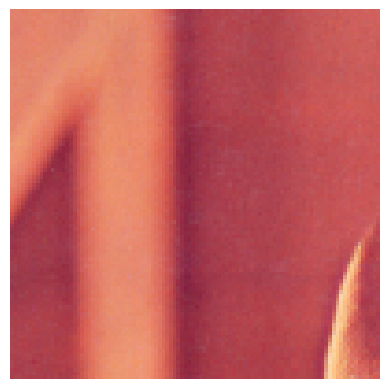

In [3]:
# 2. Display only the top left corner of 100x100 pixels.
# • Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
# Array Indexing.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/AiWorkshop/lenna_image.png"
image = Image.open(image_path)
image_array = np.array(image)
top_left_corner = image_array[:100, :100]

plt.imshow(top_left_corner)
plt.axis("off")
plt.show()



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


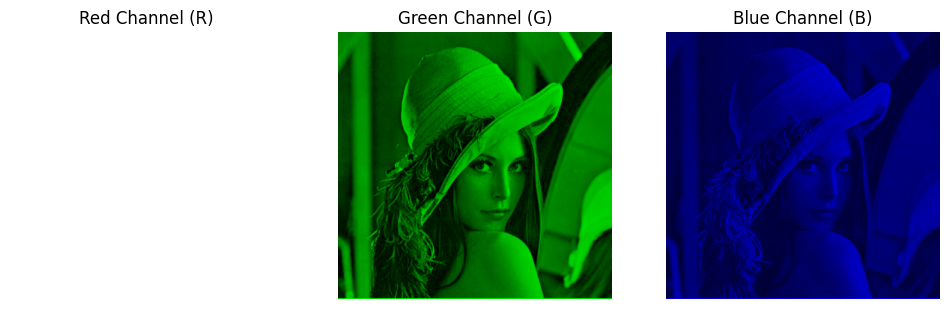

In [5]:
# Show the three color channels (R, G, B).
# • Separate the image into its three color channels (Red, Green, and Blue) and display them
# individually, labeling each channel as R, G, and B.{Using NumPy.}
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/AiWorkshop/lenna_image.png"
image = Image.open(image_path)

image_array = np.array(image)
red_channel = image_array.copy()
red_channel[:, :, 1:] = 0

green_channel = image_array.copy()
green_channel[:, :, [0, 2]] = 0

blue_channel = image_array.copy()
blue_channel[:, :, :2] = 0
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(red_channel)
ax[0].set_title("Red Channel (R)")
ax[0].axis("off")

ax[1].imshow(green_channel)
ax[1].set_title("Green Channel (G)")
ax[1].axis("off")

ax[2].imshow(blue_channel)
ax[2].set_title("Blue Channel (B)")
ax[2].axis("off")

plt.show()



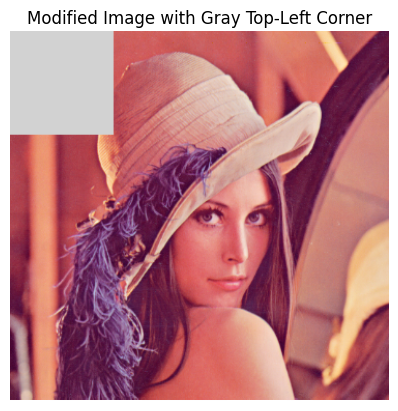

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image to RGB (ensures no alpha issues)
image_path = "/content/drive/MyDrive/AiWorkshop/lenna_image.png"
image = Image.open(image_path).convert("RGB")  # Convert to RGB to avoid shape mismatches
image_array = np.array(image)

# Modify the top-left 100×100 pixels to light gray (210, 210, 210)
image_array[:100, :100] = [210, 210, 210]

# Convert back to Image and display
plt.imshow(Image.fromarray(image_array))
plt.axis("off")
plt.title("Modified Image with Gray Top-Left Corner")
plt.show()


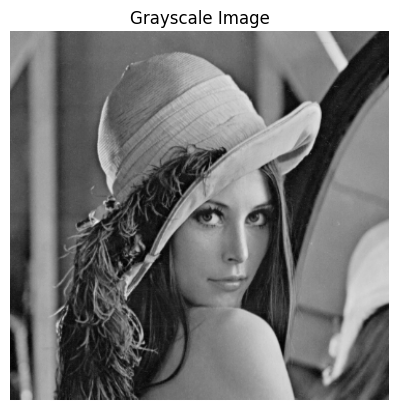

In [9]:
# 1. Load and display a grayscale image.
# • Load a grayscale image using the Pillow library.
# • Display the grayscale image using matplotlib.
from PIL import Image
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image_path = "/content/drive/MyDrive/AiWorkshop/lenna_image.png"
gray_image = Image.open(image_path).convert("L")

# Display the grayscale image
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()


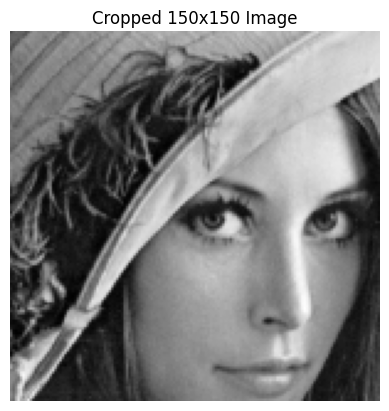

In [10]:
# 2. Extract and display the middle section of the image (150 pixels).
# • Extract a 150 pixel section from the center of the image using NumPy array slicing.
# • Display this cropped image using matplotlib.

image_path = "/content/drive/MyDrive/AiWorkshop/lenna_image.png"
gray_image = Image.open(image_path).convert("L")

image_array = np.array(gray_image)
height, width = image_array.shape
center = (height // 2, width // 2)
crop_size = 150
cropped_image = image_array[center[0] - crop_size // 2:center[0] + crop_size // 2,
                            center[1] - crop_size // 2:center[1] + crop_size // 2]
plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.title("Cropped 150x150 Image")
plt.show()


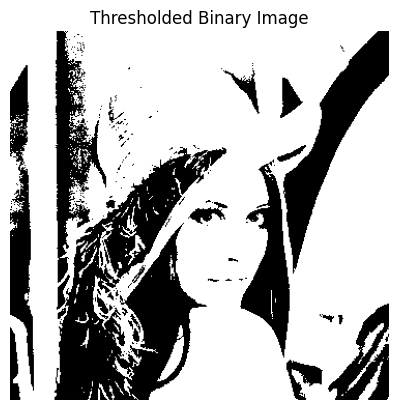

In [11]:
# 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
# • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
# above 100 to 255 (creating a binary image).
# • Display the resulting binary image.

threshold_image = np.where(image_array < 100, 0, 255)

plt.imshow(threshold_image, cmap="gray")
plt.axis("off")
plt.title("Thresholded Binary Image")
plt.show()


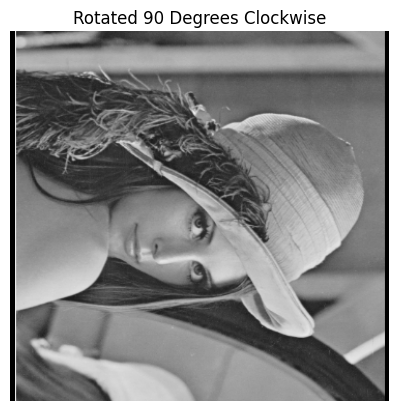

In [12]:
# Rotate the grayscale image 90 degrees clockwise
rotated_image = gray_image.rotate(-90)

# Display the rotated image
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("Rotated 90 Degrees Clockwise")
plt.show()


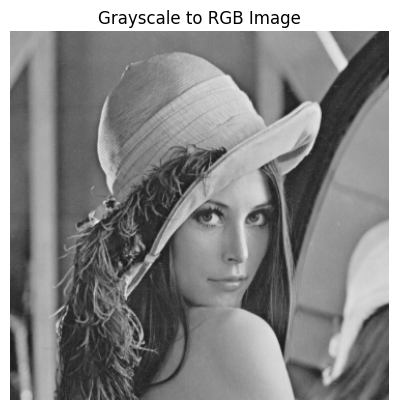

In [13]:
# Convert grayscale to RGB by stacking the grayscale image across 3 channels
rgb_image = np.stack((image_array,)*3, axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Grayscale to RGB Image")
plt.show()


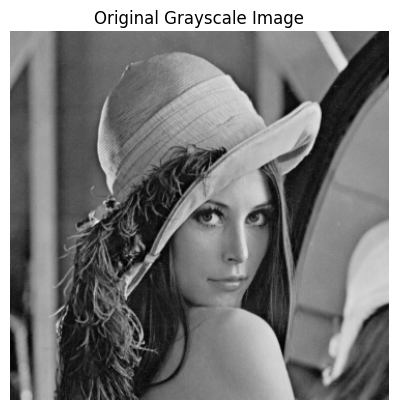

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = "/content/drive/MyDrive/AiWorkshop/lenna_image.png"
image = Image.open(image_path)

image_gray = image.convert("L")
image_array = np.array(image_gray)
plt.imshow(image_array, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean

std_dev = np.std(centered_data, axis=0)
standardized_data = centered_data / std_dev


In [16]:
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate some dummy data
X, _ = make_classification(n_samples=500, n_features=20, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Save the data
with open("cumulative_variance.pkl", "wb") as f:
    pickle.dump(cumulative_variance, f)

print("Cumulative variance data saved as 'cumulative_variance.pkl'.")


Cumulative variance data saved as 'cumulative_variance.pkl'.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load sample image dataset (handwritten digits)
digits = load_digits()
images = digits.images  # All images (1797, 8, 8)
X = digits.data  # Flattened images (1797, 64)

# Standardize the data before PCA (important for PCA performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define PCA values (number of principal components)
k_values = [10, 20, 50, 64]  # Max is 64, as there are 64 features
reconstructed_images = []

# Perform PCA and reconstruct images
for k in k_values:
    pca = PCA(n_components=k)
    reduced = pca.fit_transform(X_scaled)  # Reduce dimensions
    reconstructed = pca.inverse_transform(reduced)  # Reconstruct image
    reconstructed_images.append(reconstructed)

# Save the original image (first image of dataset)
with open("original_image.pkl", "wb") as f:
    pickle.dump(images[0], f)  # Save the first image in the dataset

# Save the reconstructed images
with open("reconstructed_images.pkl", "wb") as f:
    pickle.dump(reconstructed_images, f)

print("✅ Saved 'original_image.pkl' and 'reconstructed_images.pkl'.")


✅ Saved 'original_image.pkl' and 'reconstructed_images.pkl'.
